In [1]:
import numpy as np
np.random.seed(42)
np.set_printoptions(suppress=True)
from scipy.optimize import least_squares, curve_fit
from matplotlib import pylab as plt
import pandas as pd
import glob
import time
from tqdm.notebook import tqdm
import os
import random

import warnings
from scipy.optimize import OptimizeWarning
warnings.simplefilter("error", OptimizeWarning)

# import seaborn as sns
# sns.set()

In [35]:
def plot_allbands_df(df,title=None,ax=plt):
    ugrizYcolors = ["violet","green","red","darkred","grey","black"]
    for i,band in enumerate("ugrizY"):
        subdf = df[df["band"]==band].reset_index(drop=True)
        x = subdf["mjd"]
        y = subdf["flux"]
        yerr = subdf["fluxerr"]
        # ax.errorbar(x,y,yerr=yerr,ls = "None",color=ugrizYcolors[i])
        ax.scatter(x,y,s=1.2,label=band,color=ugrizYcolors[i])
        if title is not None:
            if ax is not plt:
                ax.set_title(title)
            else:
                ax.title(title)
    return ax

In [3]:
filels = glob.glob("csv_data/*.csv")

<module 'matplotlib.pylab' from '/home/sidchaini/resspect_work/.venvs/newresspect/lib/python3.8/site-packages/matplotlib/pylab.py'>

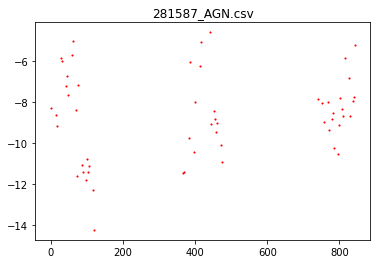

In [36]:
plot_allbands_df(df[df["band"]=="r"],title=file.split("/")[-1])

In [79]:
def give_detected_info(file,mismatchdict={},plot=False,print_errratiolessthan5=False,print_mismatchcount=False):
    title=file.split("/")[-1]
    title_class = title.split("_")[-1].split(".")[0]
    if title_class not in mismatchdict.keys():
        mismatchdict[title_class] = 0
    
    df = pd.read_csv(file)
    df["mjd"] = df["mjd"] - df["mjd"][0]
    imax = abs(df["flux"]/df["fluxerr"]).argmax()
    
    if print_errratiolessthan5 and abs(df["flux"]/df["fluxerr"]).max() < 5:
        print(title)
    
    mjdmax = df["mjd"][imax]
    df["sid_bool"]=0
    df.loc[(df["mjd"] >= mjdmax-100) & (df["mjd"] <= mjdmax+100),"sid_bool"] = 1
    mismatch_count = len(df.loc[df["detected_bool"] - df["sid_bool"] == 1])

    if mismatch_count > 0:
        mismatchdict[title_class] = mismatchdict[title_class] + 1
        if print_mismatchcount:
            print(f"Mismatch Count = {mismatch_count} for {file.split('/')[-1]}")
    
    if plot:
        subdf = df[df["sid_bool"] == 1].reset_index(drop=True)
        f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
        x = df["mjd"]
        y = df["flux"]
        ax1.scatter(x,y,s=1.2)
        plot_allbands_df(subdf,ax=ax2,title=title)

        plt.suptitle(file.split("/")[-1])
        plt.show()
    return mismatchdict

In [80]:
mismatchdict={}
for file in filels:
    mismatchdict = give_detected_info(file,mismatchdict)

In [81]:
mismatchdict

{'SNIa-91bg': 1,
 'TDE': 7,
 'SNII': 3,
 'SNIbc': 0,
 'SNIa': 3,
 'SLSN-I': 15,
 'SNIax': 1,
 'AGN': 59}

In [84]:
mismatchdict = {}
# for file in random.sample(filels,100):
for file in filels:
    title=file.split("/")[-1]
    title_class = title.split("_")[-1].split(".")[0]
    if title_class not in mismatchdict.keys():
        mismatchdict[title_class] = 0
#     f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
    
    df = pd.read_csv(file)
    df["mjd"] = df["mjd"] - df["mjd"][0]
#     x = df["mjd"]
#     y = df["flux"]
#     ax1.scatter(x,y,s=1.2)
    imax = abs(df["flux"]/df["fluxerr"]).argmax()
#     if abs(df["flux"]/df["fluxerr"]).max() < 5:
#         print(title)
    mjdmax = df["mjd"][imax]
    df["sid_bool"]=0
    df.loc[(df["mjd"] >= mjdmax-100) & (df["mjd"] <= mjdmax+100),"sid_bool"] = 1
    mismatch_count = len(df.loc[df["detected_bool"] - df["sid_bool"] == 1])
    if mismatch_count > 0:
        mismatchdict[title_class] = mismatchdict[title_class] + 1
        print(f"Mismatch Count = {mismatch_count} for {file.split('/')[-1]}")
    
    subdf = df[df["sid_bool"] == 1].reset_index(drop=True)
    
#     plot_allbands_df(subdf,ax=ax2,title=title)
    
#     plt.suptitle(file.split("/")[-1])
#     plt.show()

Mismatch Count = 62 for 227152_AGN.csv
Mismatch Count = 1 for 69795_AGN.csv
Mismatch Count = 75 for 272103_AGN.csv
Mismatch Count = 68 for 204227_AGN.csv
Mismatch Count = 2 for 299008_TDE.csv
Mismatch Count = 39 for 220372_AGN.csv
Mismatch Count = 1 for 221529_SLSN-I.csv
Mismatch Count = 111 for 281587_AGN.csv
Mismatch Count = 116 for 75803_AGN.csv
Mismatch Count = 177 for 198396_AGN.csv
Mismatch Count = 2 for 153443_SNII.csv
Mismatch Count = 1 for 88056_SLSN-I.csv
Mismatch Count = 7 for 267239_AGN.csv
Mismatch Count = 143 for 91871_AGN.csv
Mismatch Count = 2 for 276084_SLSN-I.csv
Mismatch Count = 3 for 329044_TDE.csv
Mismatch Count = 15 for 58539_SLSN-I.csv
Mismatch Count = 59 for 315884_AGN.csv
Mismatch Count = 1 for 116440_SNII.csv
Mismatch Count = 3 for 337020_SNII.csv
Mismatch Count = 44 for 94074_AGN.csv
Mismatch Count = 35 for 287551_AGN.csv
Mismatch Count = 7 for 321618_AGN.csv
Mismatch Count = 2 for 316235_SLSN-I.csv
Mismatch Count = 121 for 231183_AGN.csv
Mismatch Count = 41 

In [85]:
mismatchdict

{'SNIa-91bg': 1,
 'TDE': 7,
 'SNII': 3,
 'SNIbc': 0,
 'SNIa': 3,
 'SLSN-I': 15,
 'SNIax': 1,
 'AGN': 59}

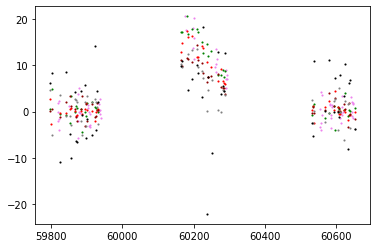

In [86]:
plot_allbands_df(pd.read_csv("csv_data/339740_TDE.csv")).show()